In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('03_Clustering_Marketing.csv',encoding='latin-1')
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [3]:
df.dtypes
#Категориальные переменные у меня всего 2: gender

gradyear            int64
gender             object
age                object
NumberOffriends     int64
basketball          int64
football            int64
soccer              int64
softball            int64
volleyball          int64
swimming            int64
cheerleading        int64
baseball            int64
tennis              int64
sports              int64
cute                int64
sex                 int64
sexy                int64
hot                 int64
kissed              int64
dance               int64
band                int64
marching            int64
music               int64
rock                int64
god                 int64
church              int64
jesus               int64
bible               int64
hair                int64
dress               int64
blonde              int64
mall                int64
shopping            int64
clothes             int64
hollister           int64
abercrombie         int64
die                 int64
death               int64
drunk       

In [4]:
df.shape

(15000, 40)

In [5]:
df.isna().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [6]:
df['gender'].value_counts()

gender
F    11057
M     2606
Name: count, dtype: int64

In [7]:
df['age'].value_counts()

age
16. Jun    24
17.399     20
17.443     20
16.591     20
17.311     19
           ..
19.45       1
21.065      1
19.699      1
106.538     1
106.511     1
Name: count, Length: 1906, dtype: int64

В общем удалю строчки с пропусками в age и gender

In [8]:
df=df.dropna(axis='index',how='any',subset=['gender'])
df=df.dropna(axis='index',how='any',subset=['age'])
df.isna().sum()

gradyear           0
gender             0
age                0
NumberOffriends    0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(df['gender'])
df['gender'] = label_encoder.transform(df['gender'])
df['age'] = df['age'].astype(str)

# Extract numeric values from 'age' column
df['age'] = df['age'].str.extract('(\d+)').astype(float)
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,2007,0,17.0,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,0,17.0,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,2008,0,16.0,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,1,18.0,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,1,18.0,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


тут я закодировал не численные значения

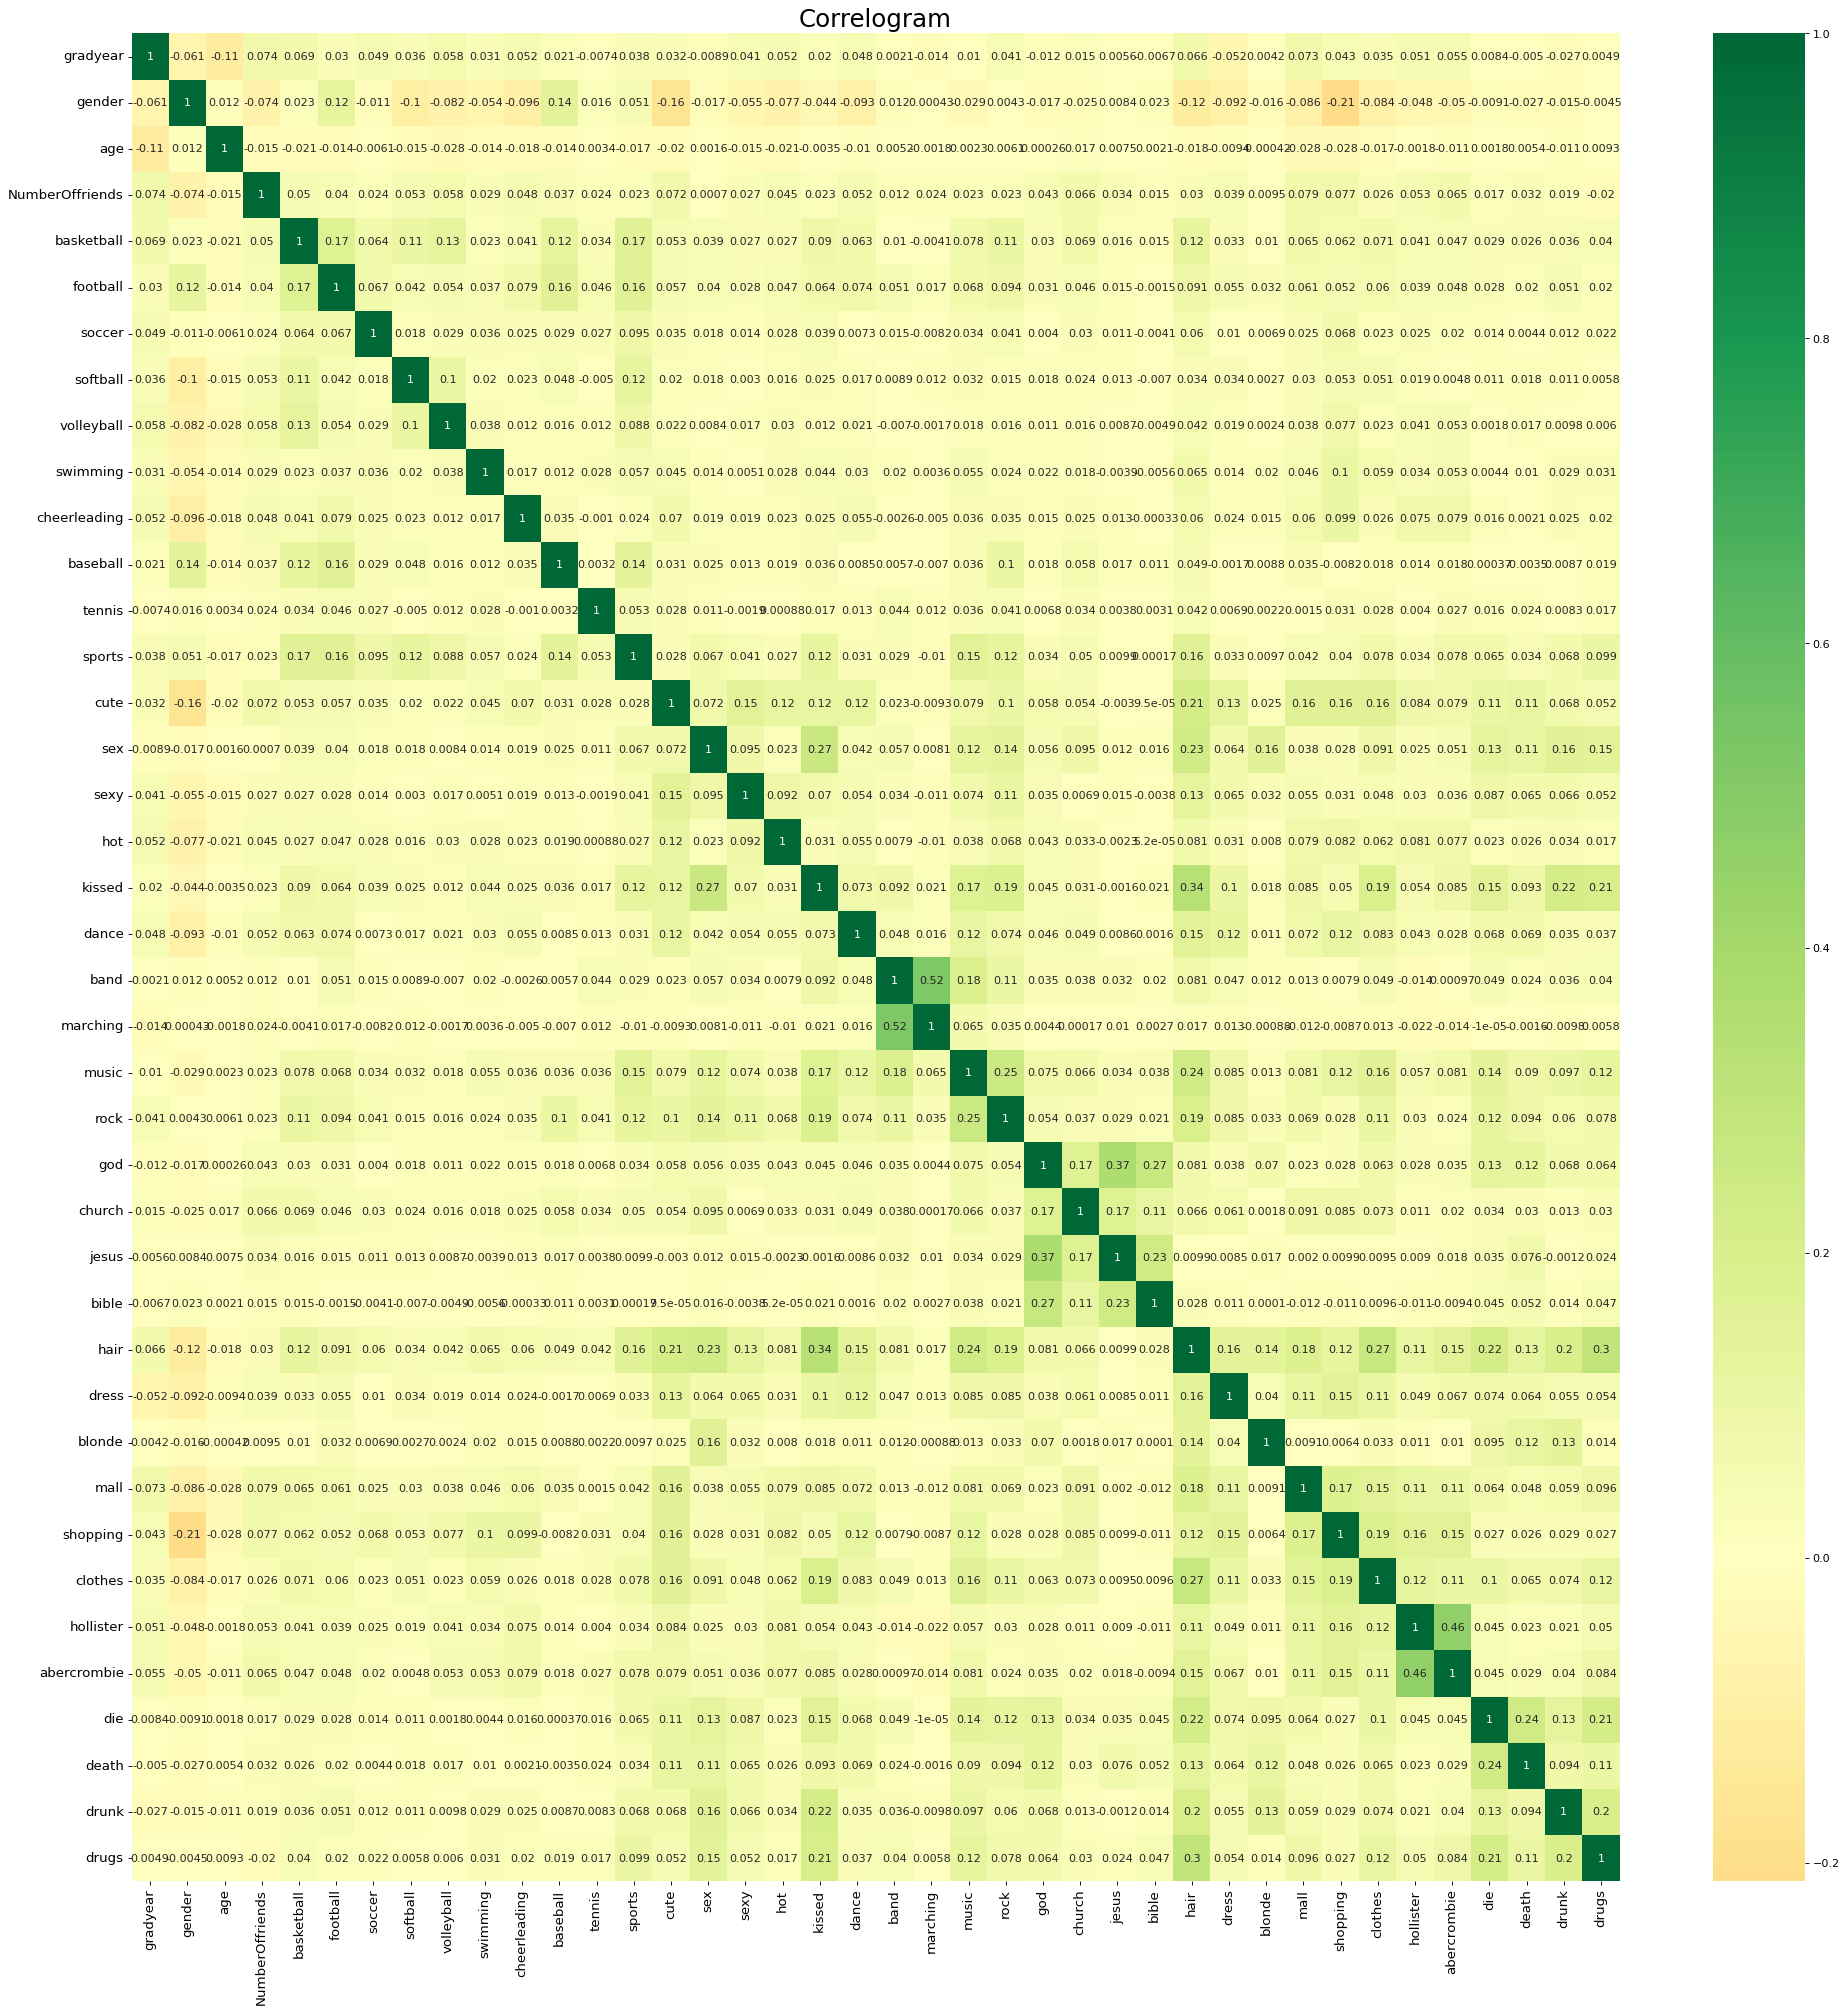

In [10]:
import seaborn as sns
plt.figure(figsize=(30,30), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
#Это реально жестко

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

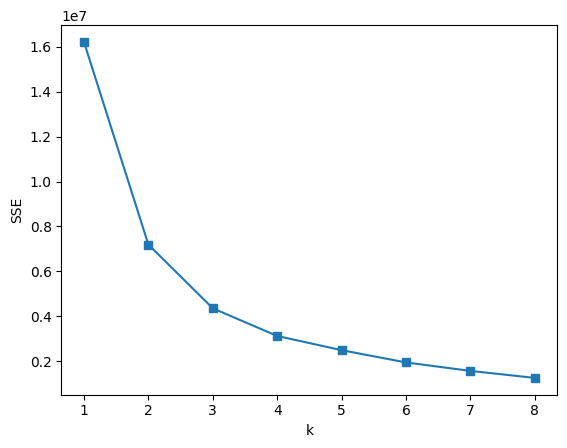

In [11]:
X = df.loc[:,:]
from sklearn.cluster import KMeans
SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()
# Кол-во кластеров - 5

In [12]:
n=5

kmeans = KMeans(n_clusters=5)

kmeans.fit(df)

Y_pred = kmeans.labels_
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 2, ..., 0, 0, 0], dtype=int32)

In [13]:

df['cluster'] = Y_pred
df


,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
1,2007,0,17.0,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,3
2,2007,0,17.0,41,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,2008,0,16.0,1,0,0,0,0,0,1,...,0,0,3,0,0,0,0,0,0,2
5,2008,1,18.0,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,1,18.0,18,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,0,16.0,21,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,0,0
14996,2008,0,16.0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
14997,2007,0,17.0,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,0,17.0,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6295750685257732


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5807859649154599


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5282498094933736


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5080681549739923


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.519507065010122


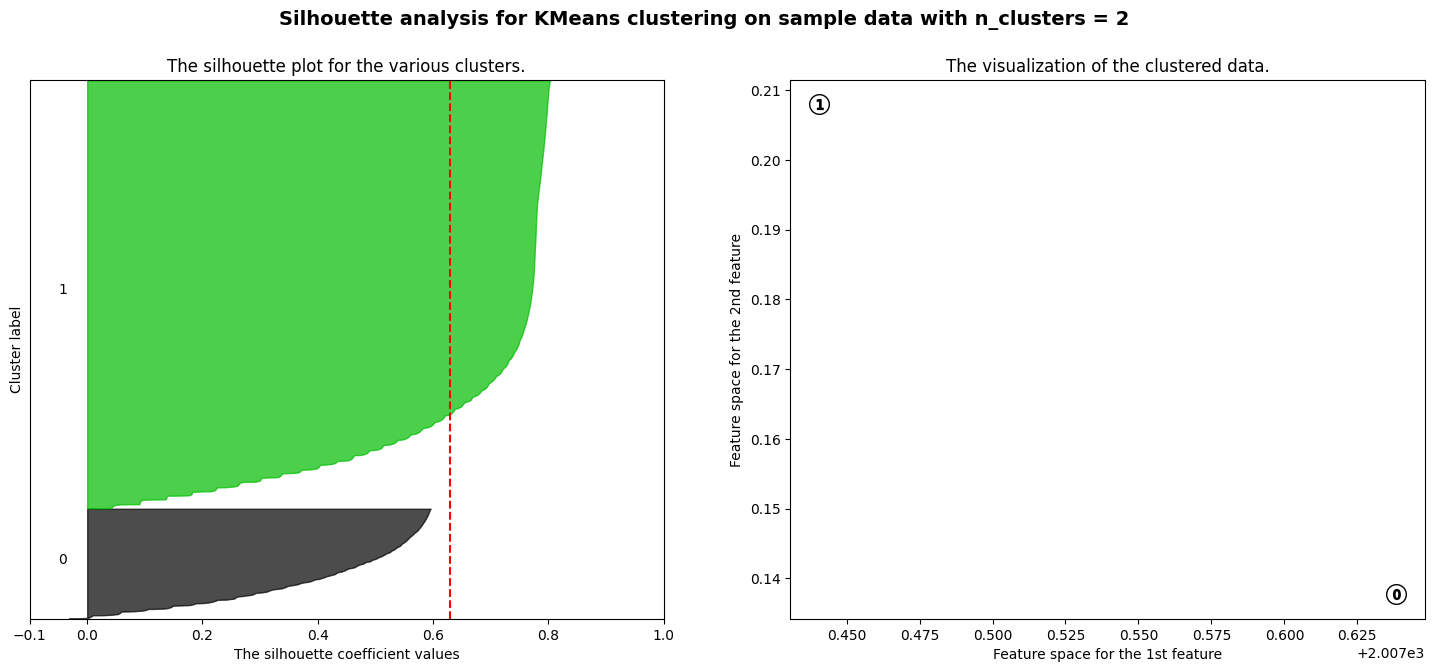

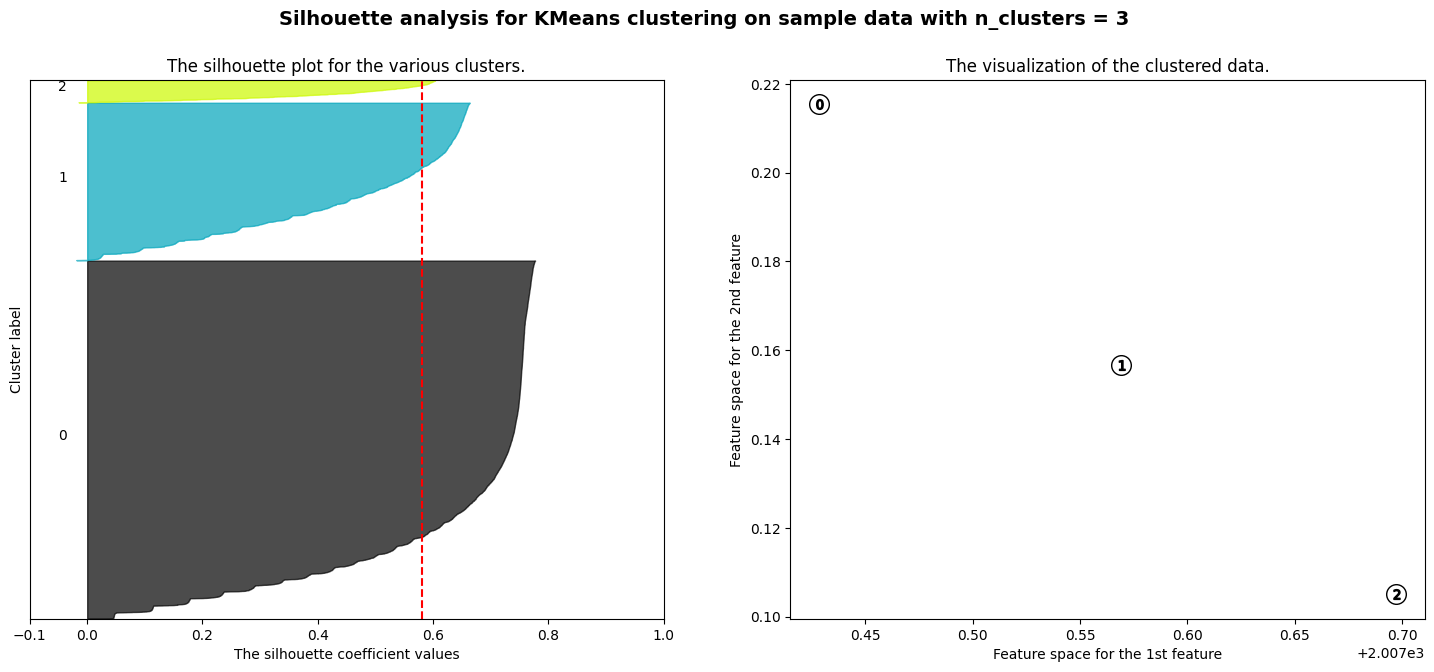

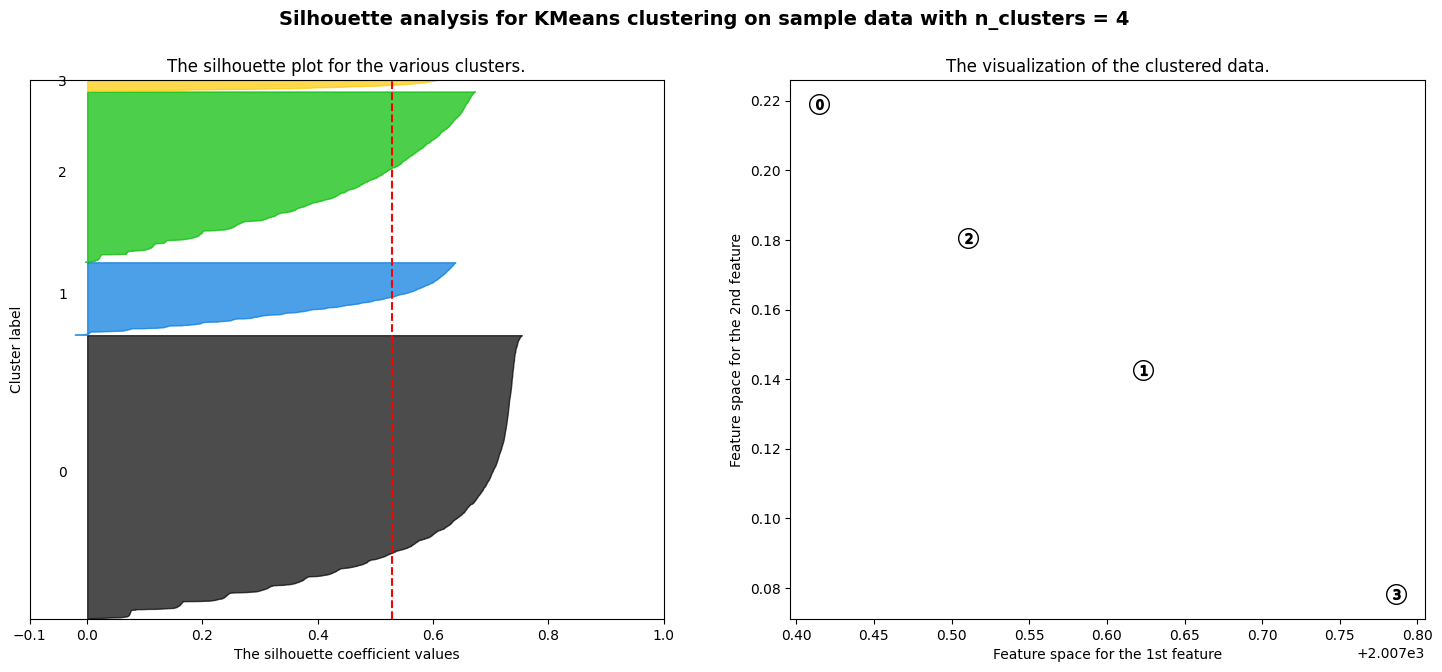

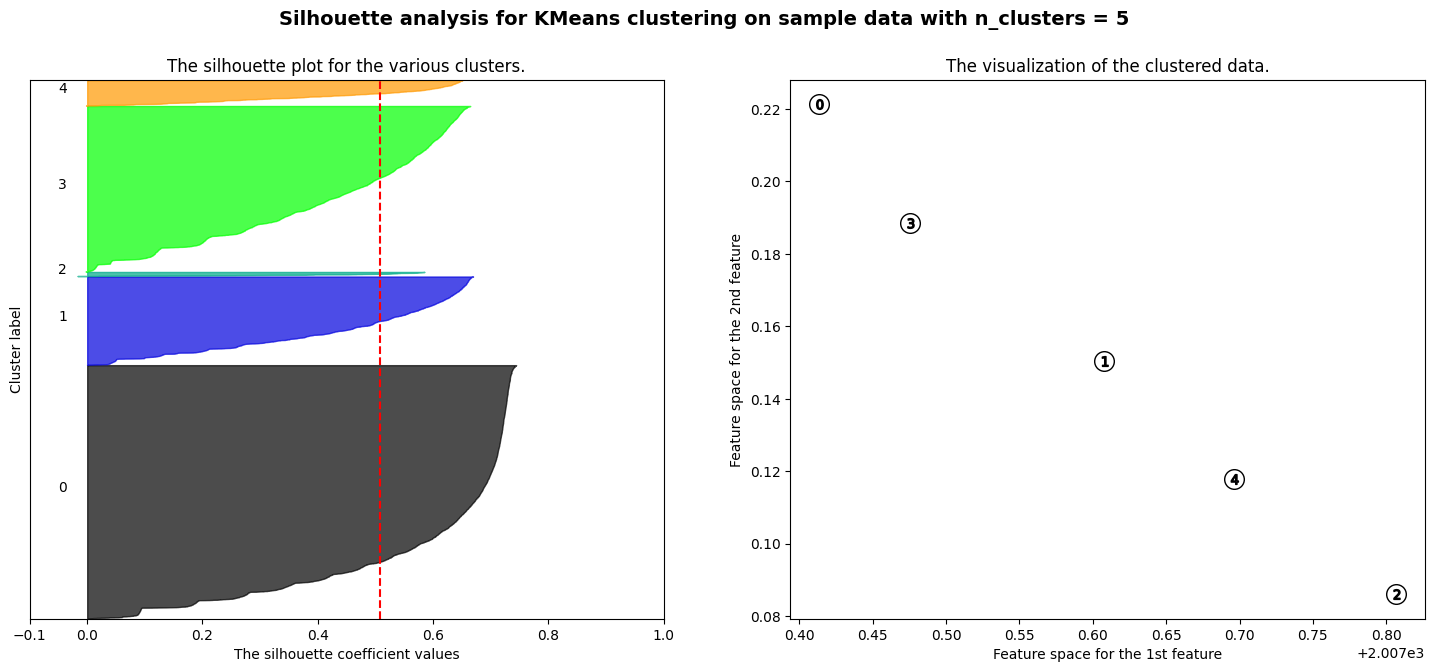

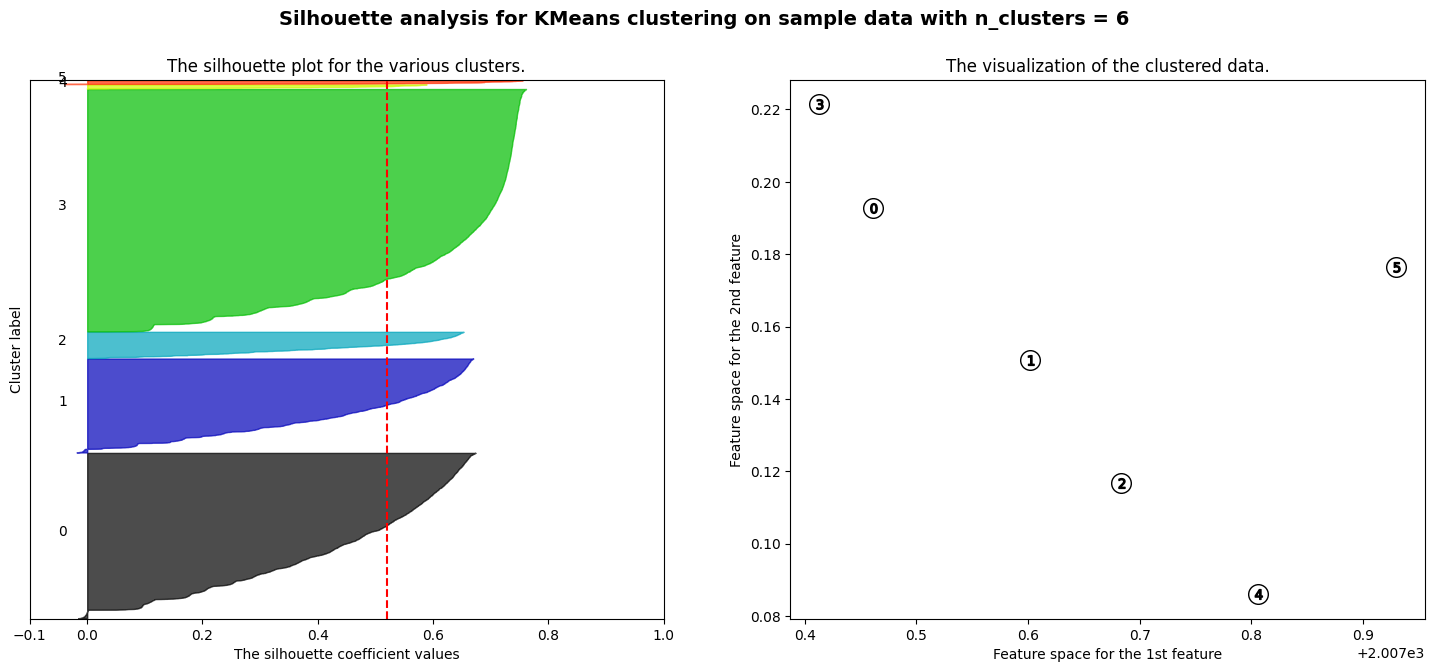

In [27]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X.iloc[:,19],X.iloc[:, 30], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

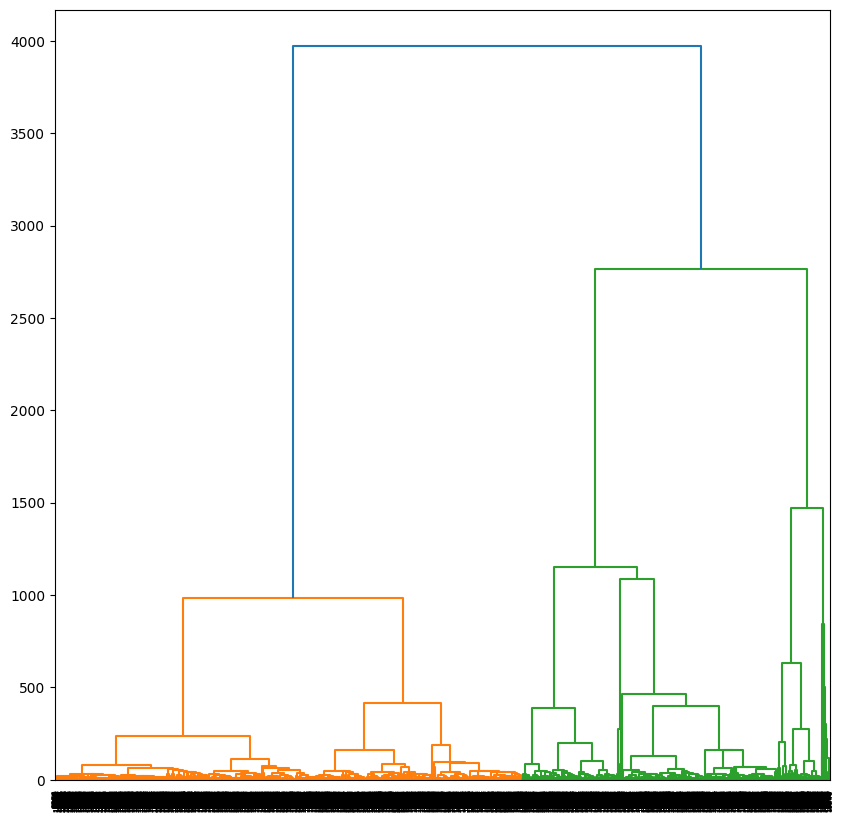

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)


In [42]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method='ward', metric='euclidean')
Z[0]

array([1.957e+03, 6.213e+03, 0.000e+00, 2.000e+00])

In [43]:
from scipy.cluster.hierarchy import fcluster

# fcluster - метод разбиения на кластеры
# принимает на вход: матрицу расстояний
# критерий разделения на кластеры

label = fcluster(Z, 1000, criterion='distance')

np.unique(label)

array([1, 2, 3, 4, 5], dtype=int32)

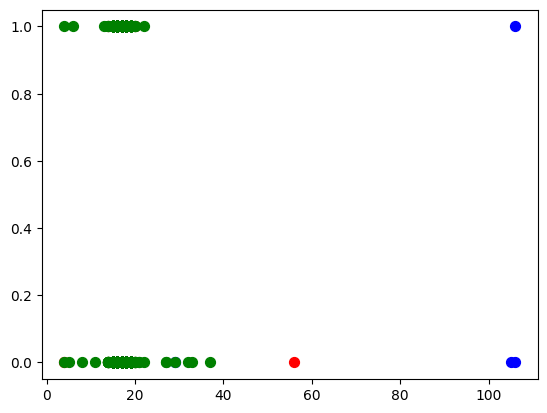

In [44]:
plt.scatter(df.loc[label==1, 'age'], df.loc[label==1, 'gender'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'age'], df.loc[label==2, 'gender'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'age'], df.loc[label==3, 'gender'], s=50, marker='o', color='green')
plt.show()